In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:

# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [12]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [13]:
# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [15]:

# Construct a linear model
activation = tf.add(tf.multiply(X, W), b)

In [16]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [21]:
# Initializing the variables
init = tf.initialize_all_variables()

Epoch: 0001 cost= 25.499111176 W= -0.6741794 b= -0.2273702
Epoch: 0051 cost= 0.119236387 W= 0.36461034 b= -0.025956009
Epoch: 0101 cost= 0.114351116 W= 0.35776976 b= 0.023254769
Epoch: 0151 cost= 0.110030241 W= 0.351336 b= 0.069538675
Epoch: 0201 cost= 0.106208615 W= 0.34528494 b= 0.11306983
Epoch: 0251 cost= 0.102828518 W= 0.33959368 b= 0.15401195
Epoch: 0301 cost= 0.099839024 W= 0.33424097 b= 0.19251913
Epoch: 0351 cost= 0.097194985 W= 0.32920665 b= 0.22873622
Epoch: 0401 cost= 0.094856516 W= 0.32447162 b= 0.26279926
Epoch: 0451 cost= 0.092788331 W= 0.3200182 b= 0.29483664
Epoch: 0501 cost= 0.090959199 W= 0.31582975 b= 0.3249684
Epoch: 0551 cost= 0.089341551 W= 0.31189036 b= 0.35330772
Epoch: 0601 cost= 0.087910928 W= 0.30818525 b= 0.37996212
Epoch: 0651 cost= 0.086645685 W= 0.3047004 b= 0.40503144
Epoch: 0701 cost= 0.085526831 W= 0.30142304 b= 0.42860883
Epoch: 0751 cost= 0.084537327 W= 0.2983405 b= 0.45078433
Epoch: 0801 cost= 0.083662279 W= 0.2954413 b= 0.4716413
Epoch: 0851 cost=

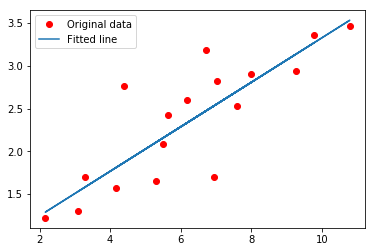

In [22]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print( "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()